# **Gold Price Forecasting**

## **Importing Libraries**

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Loading the Dataset**

In [6]:
df = pd.read_csv("/content/drive/MyDrive/Data Science Learning/7. ML Projects /2. Gold Price Analysis/2. Gold Price.csv")
df.head()

,Date,Price,Open,High,Low,Volume,Chg%
0,2014-01-01,29542,29435,29598,29340,2930,0.25
1,2014-01-02,29975,29678,30050,29678,3140,1.47
2,2014-01-03,29727,30031,30125,29539,3050,-0.83
3,2014-01-04,29279,29279,29279,29279,0,-1.51
4,2014-01-06,29119,29300,29395,29051,24380,-0.55


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
df.shape

(2227, 7)

In [9]:
df.isnull().sum()

,0
Date,0
Price,0
Open,0
High,0
Low,0
Volume,0
Chg%,0


### **Observation:**
***
* #### No Null Values in the dataset

## **Convert the 'Date' column to datetime**

In [10]:
df['Date'] = pd.to_datetime(df['Date'])

In [11]:
dff = df.copy()

## **setting Date as the index**

In [12]:
df.set_index('Date', inplace=True)

## **Visualizing the Gold Price over the Time**

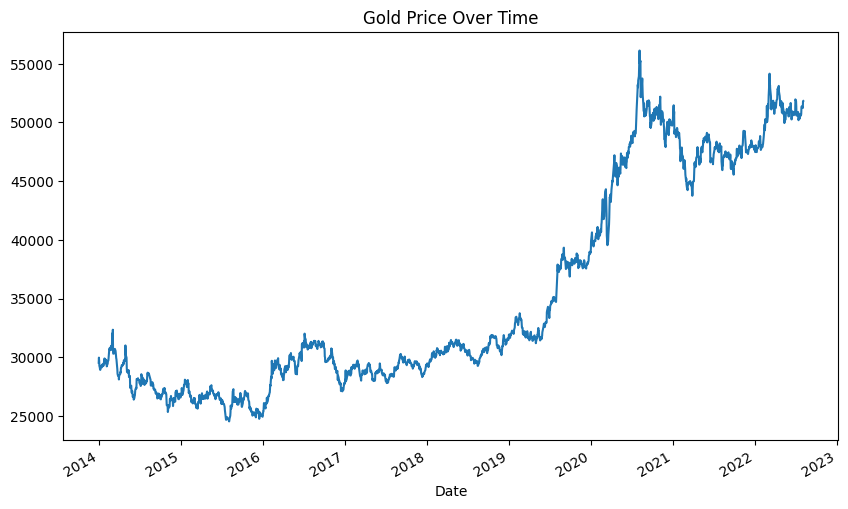

In [13]:
df['Price'].plot(figsize=(10, 6))
plt.title('Gold Price Over Time')
plt.show()

### **Observation:**
***
* #### From the above plot we can see that Gold Price is following a trend and there are No Seasonal Cycles over the Time

## **Testing For Stationarity**

In [14]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Price'])

print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: 0.21426864211695315
p-value: 0.9730506190416429


### **Observation**
***
#### 1. Since P-Value is > 0.05 , Data is Non-Stationary.

#### 2. Hence we need to perform Differencing

## **Differencing**

In [15]:
# Performing first-order differencing
df['Price_Diff'] = df['Price'] - df['Price'].shift(1)

In [16]:
result_diff = adfuller(df['Price_Diff'].dropna())
print(f'ADF Statistic (Differenced Data): {result_diff[0]}')
print(f'p-value (Differenced Data): {result_diff[1]}')

ADF Statistic (Differenced Data): -13.171606069660308
p-value (Differenced Data): 1.247139266795002e-24


In [17]:
1.247139266795002e-24 < 0.05

True

In [18]:
# Dropping NaN values introduced by shifting
df['Price_Diff'].dropna(inplace=True)

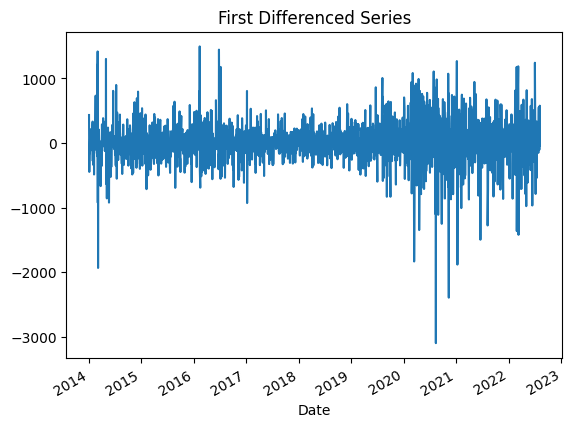

In [19]:
# Visualizing the differenced series to check for stationarity
df['Price_Diff'].plot(title='First Differenced Series')
plt.show()

> ### Now Price Feature is Stationary

## **Model Selection (ARIMA or SARIMA)**
***

> ### 1. The Price over time is a trend series and there are no seasonal cycles over the time

> ### 2. Now the Price feature is Stationary after 1st Differencing

> ### 3. We need to Forecast the Gold Price for Short term

> ### 4. Hence, we can use ***ARIMA for Gold Price Forecasting***

***
***

## **Applying ARIMA Model**
***


### **Autocorrelation and Partial Autocorrelation Plots**

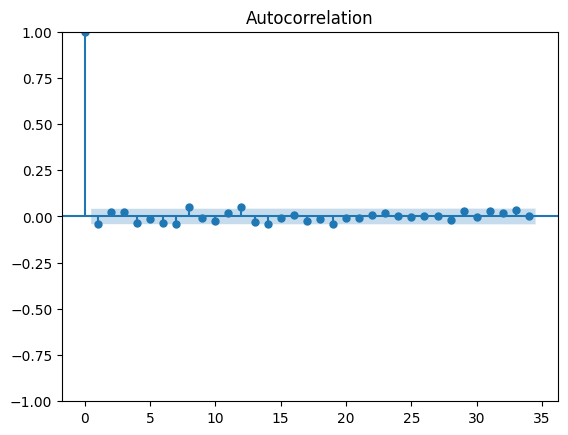

In [20]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df['Price_Diff'].dropna())

plt.show()

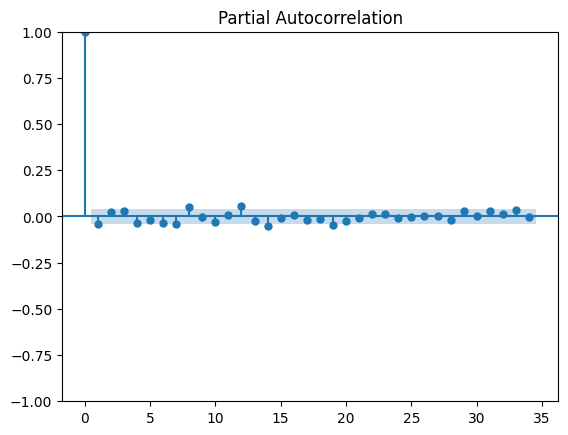

In [21]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(df['Price_Diff'].dropna())

plt.show()

## **Training the Model**

In [22]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model
model = ARIMA(df['Price'], order=(2, 1, 1))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

## **Forecasting on the existing data**

In [23]:
# Forecast within the existing data range
start = 1
end = len(df) - 1

forecast = model_fit.predict(start=start, end=end, typ='levels')

df['Forecast'] = forecast

In [24]:
# Drop NaN values from actual and forecasted data
actual_prices = df['Price'].iloc[1:]  # Removing the first NaN caused by differencing
forecast_prices = df['Forecast'].dropna()  # Removing any NaN from forecast

# Ensure both series are aligned
actual_prices, forecast_prices = actual_prices.align(forecast_prices, join='inner')

## **Comparing the forecast with actual values**

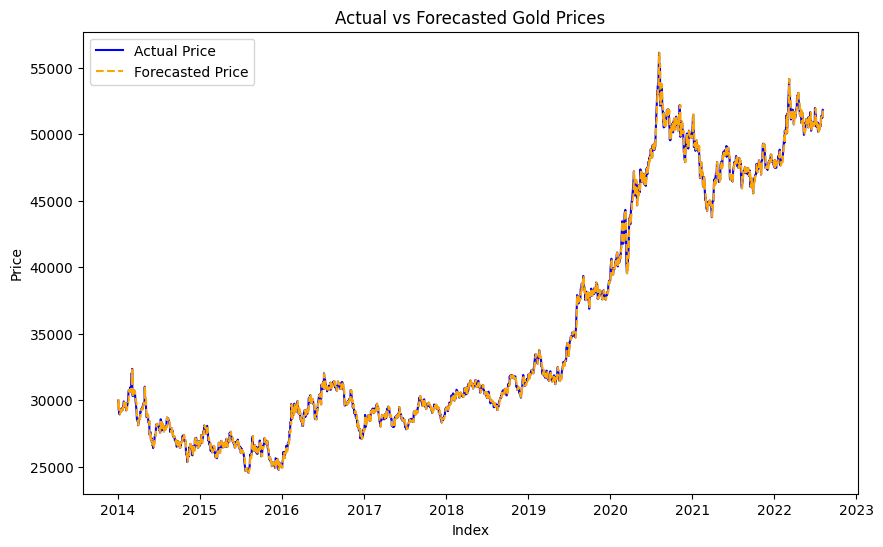

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(actual_prices, label='Actual Price', color='blue')
plt.plot(forecast_prices, label='Forecasted Price', color='orange', linestyle='--')
plt.title('Actual vs Forecasted Gold Prices')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
plt.show()

## **Evaluating the Model**

In [26]:
from sklearn.metrics import mean_squared_error

# Calculate RMSE
mse = mean_squared_error(actual_prices, forecast_prices)
rmse = np.sqrt(mse)

print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 322.21121247716593


## **Forecasting Future Values**

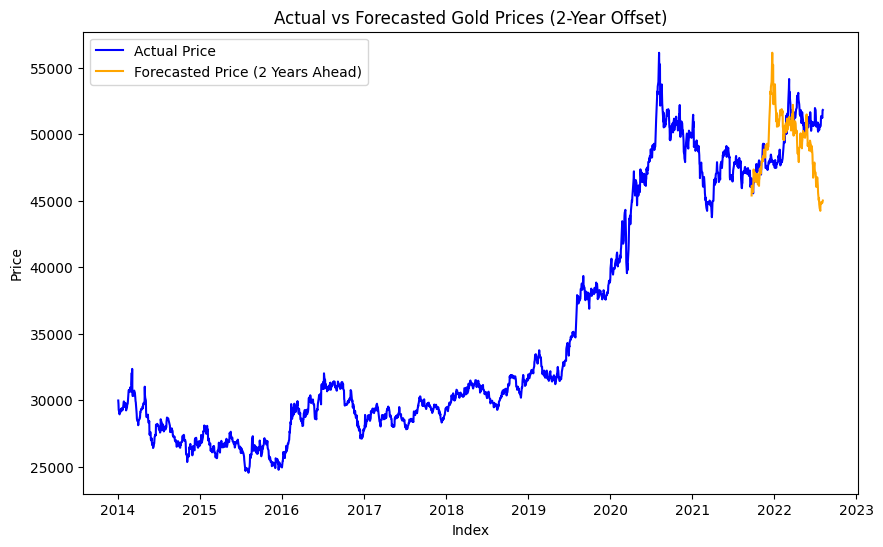

In [33]:
offset = 356
forecast_prices_shifted = forecast_prices.shift(offset)

plt.figure(figsize=(10, 6))
plt.plot(actual_prices, label='Actual Price', color='blue')
plt.plot(forecast_prices_shifted[2000:3500], label='Forecasted Price (2 Years Ahead)', color='orange', linestyle='solid')

plt.title('Actual vs Forecasted Gold Prices (2-Year Offset)')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
plt.show()
